In [85]:
# pip install missingno

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import warnings
warnings.filterwarnings("ignore")

import datetime as dt

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

from mpl_toolkits.mplot3d import Axes3D

In [87]:
# Import Dataset
df = pd.read_excel('df3.xlsx')

In [88]:
df

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,...,year,month,day,dayofweek,dayofyear,weekofyear,quarter,birth_year,Age,age_category
0,536365,85123A,201012,White Hanging Heart T-Light Holder,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,...,2010,12,1,3,335,48,4,1973,38,Millenials
1,536365,71053,201012,White Metal Lantern,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,...,2010,12,1,3,335,48,4,1973,38,Millenials
2,536365,84406B,201012,Cream Cupid Hearts Coat Hanger,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,...,2010,12,1,3,335,48,4,1973,38,Millenials
3,536365,84029G,201012,Knitted Union Flag Hot Water Bottle,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,...,2010,12,1,3,335,48,4,1973,38,Millenials
4,536365,84029E,201012,Red Woolly Hottie White Heart.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,...,2010,12,1,3,335,48,4,1973,38,Millenials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380615,579885,85034C,201111,3 Rose Morris Boxed Candles,4,17,2011-11-30 17:37:00,1.25,15444,United Kingdom,...,2011,11,30,3,334,48,4,1952,59,Baby Boomers
380616,579885,21742,201111,Large Round Wicker Platter,2,17,2011-11-30 17:37:00,5.95,15444,United Kingdom,...,2011,11,30,3,334,48,4,1952,59,Baby Boomers
380617,579885,23084,201111,Rabbit Night Light,6,17,2011-11-30 17:37:00,2.08,15444,United Kingdom,...,2011,11,30,3,334,48,4,1952,59,Baby Boomers
380618,579885,21257,201111,Victorian Sewing Box Medium,1,17,2011-11-30 17:37:00,7.95,15444,United Kingdom,...,2011,11,30,3,334,48,4,1952,59,Baby Boomers


In [89]:
df[['Quantity','UnitPrice','AmountSpent']]

,Quantity,UnitPrice,AmountSpent
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34
...,...,...,...
380615,4,1.25,5.00
380616,2,5.95,11.90
380617,6,2.08,12.48
380618,1,7.95,7.95


In [90]:
customer_country=df[['Country','CustomerID']].drop_duplicates()

customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index()\
                .sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3887
14,Germany,93
13,France,86
30,Spain,29
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,11
1,Austria,11


In [91]:
# use country: france as our dataset
data = pd.read_excel('df_france.xlsx')

In [92]:
data

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,...,year,month,day,dayofweek,dayofyear,weekofyear,quarter,birth_year,Age,age_category
0,536370,22728,201012,Alarm Clock Bakelike Pink,24,8,2010-12-01 08:45:00,3.75,12583,France,...,2010,12,1,3,335,48,4,1976,35,Millenials
1,536370,22727,201012,Alarm Clock Bakelike Red,24,8,2010-12-01 08:45:00,3.75,12583,France,...,2010,12,1,3,335,48,4,1976,35,Millenials
2,536370,22726,201012,Alarm Clock Bakelike Green,12,8,2010-12-01 08:45:00,3.75,12583,France,...,2010,12,1,3,335,48,4,1976,35,Millenials
3,536370,21724,201012,Panda And Bunnies Sticker Sheet,12,8,2010-12-01 08:45:00,0.85,12583,France,...,2010,12,1,3,335,48,4,1976,35,Millenials
4,536370,21883,201012,Stars Gift Tape,24,8,2010-12-01 08:45:00,0.65,12583,France,...,2010,12,1,3,335,48,4,1976,35,Millenials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8013,579870,22636,201111,Childs Breakfast Set Circus Parade,2,16,2011-11-30 16:47:00,8.50,12437,France,...,2011,11,30,3,334,48,4,1993,18,Generation Z
8014,579870,84279P,201111,Cherry Blossom Decorative Flask,4,16,2011-11-30 16:47:00,3.75,12437,France,...,2011,11,30,3,334,48,4,1993,18,Generation Z
8015,579870,22551,201111,Plasters In Tin Spaceboy,12,16,2011-11-30 16:47:00,1.65,12437,France,...,2011,11,30,3,334,48,4,1993,18,Generation Z
8016,579870,22554,201111,Plasters In Tin Woodland Animals,12,16,2011-11-30 16:47:00,1.65,12437,France,...,2011,11,30,3,334,48,4,1993,18,Generation Z


<AxesSubplot:>

InvoiceNo           0
StockCode           0
year_month          0
Description         0
Quantity            0
hour                0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
CustomerName        0
CustomerEmail       0
Gender              0
DateOfBirth         0
Profession          0
MonthlyIncome       0
EducationalLevel    0
MaritalStatus       0
AmountSpent         0
Dayname             0
month_year          0
year                0
month               0
day                 0
dayofweek           0
dayofyear           0
weekofyear          0
quarter             0
birth_year          0
Age                 0
age_category        0
dtype: int64

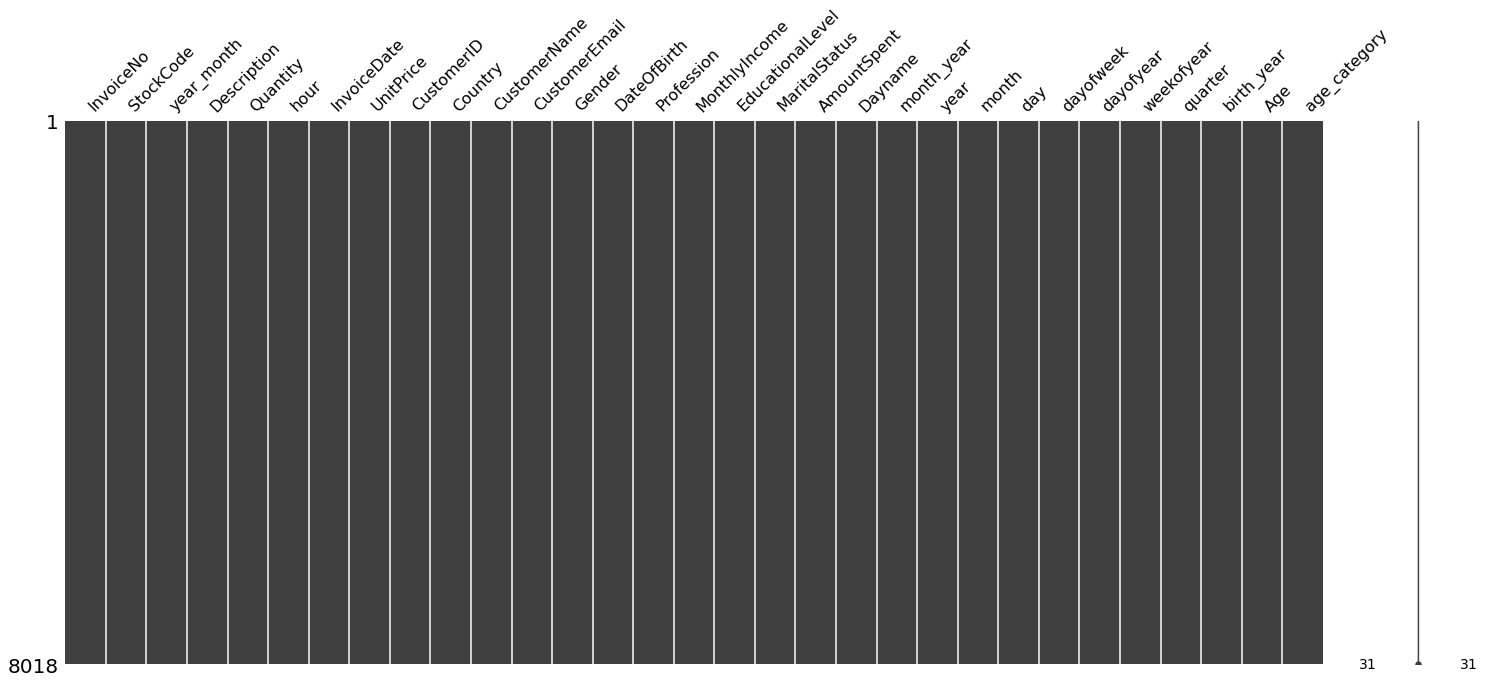

In [93]:
# Check missing values from the data
display(missingno.matrix(data))
display(data.isnull().sum())

In [94]:
data.dtypes

InvoiceNo                    int64
StockCode                   object
year_month                   int64
Description                 object
Quantity                     int64
hour                         int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                   int64
Country                     object
CustomerName                object
CustomerEmail               object
Gender                      object
DateOfBirth         datetime64[ns]
Profession                  object
MonthlyIncome              float64
EducationalLevel            object
MaritalStatus               object
AmountSpent                float64
Dayname                     object
month_year                  object
year                         int64
month                        int64
day                          int64
dayofweek                    int64
dayofyear                    int64
weekofyear                   int64
quarter                      int64
birth_year          

## **Create RFM Modeling**

In [95]:
# # reset index to get ID
# data.reset_index(inplace=True)

In [96]:
# # rename columns
# data.rename(columns= {'index' : 'No'}, inplace=True)

In [97]:
# Convert the string date field to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [98]:
least_recent_date = data['InvoiceDate'].min()
most_recent_date = data['InvoiceDate'].max()
display(print('least recent date: ',least_recent_date))
display(print('most recent date: ',most_recent_date))

least recent date:  2010-12-01 08:45:00


None

most recent date:  2011-11-30 16:47:00


None

In [99]:
# Set Latest date 2011-11-30 as last invoice date was 2011-11-29. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,11,29)

In [100]:
# Create RFM Modelling scores for each customer
RFMScores = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'AmountSpent': lambda x: x.sum()})
RFMScores

,InvoiceDate,InvoiceNo,AmountSpent
CustomerID,,,
12413,55,38,758.10
12437,-2,197,4785.51
12441,355,11,173.55
12488,-2,55,1298.66
12489,325,15,334.93
...,...,...,...
12734,341,4,110.40
12735,304,43,779.57
12736,321,4,234.00


In [101]:
# # Add feature CustomerID into data
# RFMScores['CustomerID'] = data['CustomerID']
# RFMScores

In [102]:
# Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

In [103]:
# Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'AmountSpent': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12413,55,38,758.10
1,12437,-2,197,4785.51
2,12441,355,11,173.55
3,12488,-2,55,1298.66
4,12489,325,15,334.93


In [104]:
data_rfm = RFMScores.reset_index()
data_rfm

,CustomerID,Recency,Frequency,Monetary
0,12413,55,38,758.10
1,12437,-2,197,4785.51
2,12441,355,11,173.55
3,12488,-2,55,1298.66
4,12489,325,15,334.93
...,...,...,...,...
81,12734,341,4,110.40
82,12735,304,43,779.57
83,12736,321,4,234.00
84,12740,52,27,427.60


**Recency**

In [105]:
recency = data_rfm[['CustomerID', 'Recency']]
recency

,CustomerID,Recency
0,12413,55
1,12437,-2
2,12441,355
3,12488,-2
4,12489,325
...,...,...
81,12734,341
82,12735,304
83,12736,321
84,12740,52


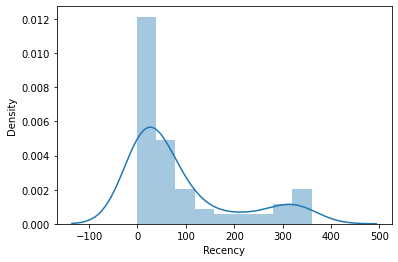

In [106]:
# Recency distribution plot
x = recency['Recency']

ax = sns.distplot(x)

**Frequency**

In [107]:
freq = data_rfm[['CustomerID', 'Frequency']]
freq

,CustomerID,Frequency
0,12413,38
1,12437,197
2,12441,11
3,12488,55
4,12489,15
...,...,...
81,12734,4
82,12735,43
83,12736,4
84,12740,27


In [108]:
# Descriptive Statistics (Frequency)
pd.DataFrame(data_rfm.Frequency.describe())

,Frequency
count,86.000000
mean,93.232558
std,116.366932
min,4.000000
25%,23.250000
50%,45.000000
75%,125.500000
max,638.000000


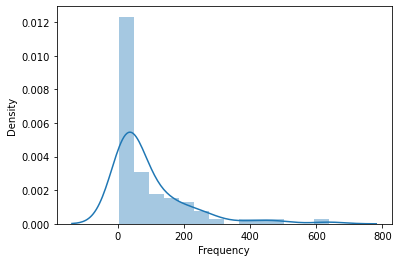

In [109]:
# Recency distribution plot
x = freq['Frequency']

ax = sns.distplot(x)

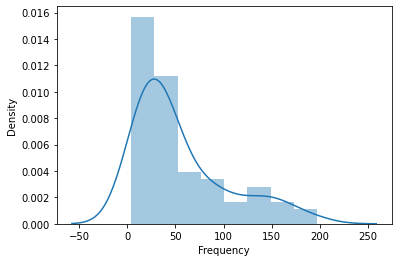

In [110]:
# Frequency distribution plot, taking observations which have frequency less than 200
x = freq.query('Frequency < 200')['Frequency']

ax = sns.distplot(x)

**Monetary**

In [111]:
monetary = data_rfm[['CustomerID', 'Monetary']]
monetary

,CustomerID,Monetary
0,12413,758.10
1,12437,4785.51
2,12441,173.55
3,12488,1298.66
4,12489,334.93
...,...,...
81,12734,110.40
82,12735,779.57
83,12736,234.00
84,12740,427.60


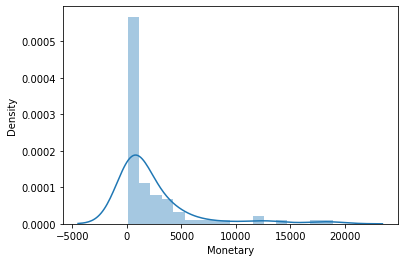

In [112]:
# Recency distribution plot
x = monetary['Monetary']

ax = sns.distplot(x)

In [113]:
# Descriptive Statistics (Monetary)
pd.DataFrame(data_rfm.Monetary.describe())

,Monetary
count,86.00000
mean,2345.89686
std,3695.81125
min,73.50000
25%,403.22750
50%,801.37000
75%,2833.31750
max,18895.91000


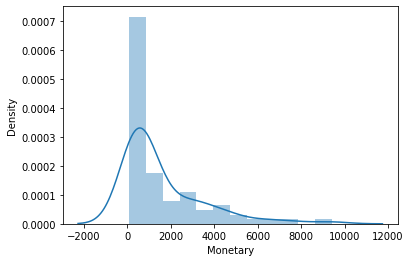

In [114]:
# Monateray distribution plot, taking observations which have monetary value less than $10.000
x = data_rfm.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

**Recency Cluster**

In [115]:
# pip install kmeans
!pip install k-means-plus-plus

  Using cached k-means-plus-plus-0.1.0.tar.gz (5.0 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\corne\AppData\Local\Temp\pip-install-vqbngb43\k-means-plus-plus_5988bdb1802541bbbb9b1ef9d9d5626b\setup.py", line 2, in <module>
          import k_means_plus_plus as kmpp
        File "C:\Users\corne\AppData\Local\Temp\pip-install-vqbngb43\k-means-plus-plus_5988bdb1802541bbbb9b1ef9d9d5626b\k_means_plus_plus\__init__.py", line 1, in <module>
          from _version import __version__
      ModuleNotFoundError: No module named '_version'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue

In [116]:
from sklearn.cluster import KMeans

In [117]:
number_of_cluster = range(2,11)
clusterings = [KMeans(n_clusters = k).fit(data_rfm) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

D_k = [cdist(data_rfm, cent, 'euclidean') for cent in centroids] 
cIdx = [np.argmin(D, axis = 1) for D in D_k] 
dist = [np.min(D, axis = 1) for D in D_k] 
avg_withinSS = [sum(d)/data_rfm.shape[0] for d in dist] 

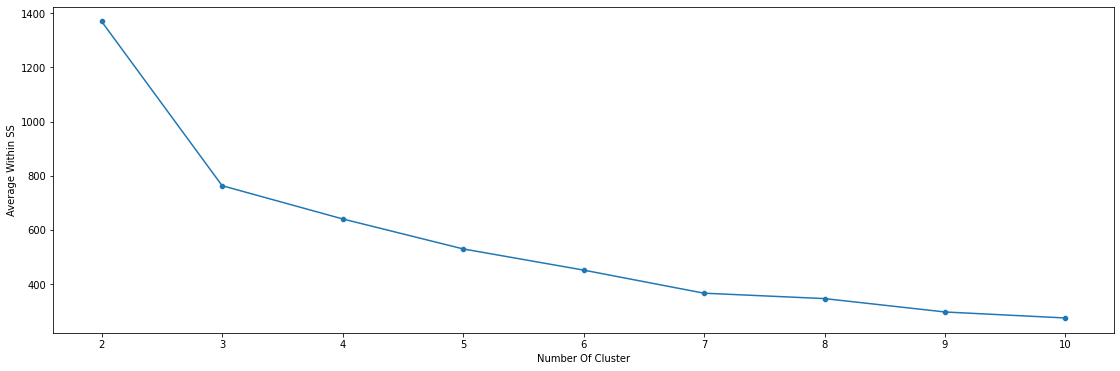

In [118]:
plt.figure(figsize=(19,6))
sns.lineplot(number_of_cluster, avg_withinSS)
sns.scatterplot(number_of_cluster, avg_withinSS)
plt.xticks(number_of_cluster)
plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within SS')
plt.show()

In [119]:
sse = {}
tx_recency = data_rfm[['Recency']]
for k in range(2,11):
    kmeans  = KMeans(n_clusters = k, max_iter = 100, random_state = 2022).fit(tx_recency)
    tx_recency['cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

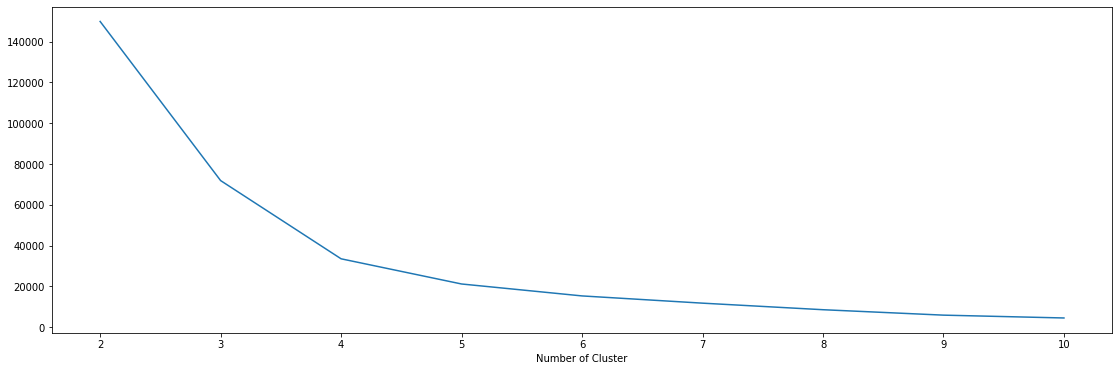

In [120]:
plt.figure(figsize=(19,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of Cluster')
plt.show()

        elbow method = 3

In [121]:
r_s_score = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters = i, random_state = 2022)
    kmeans.fit(tx_recency)
    labels = kmeans.labels_
    r_s_score.append(silhouette_score(tx_recency, labels, metric = 'euclidean'))

In [122]:
pd.DataFrame({
    'cluster' : [2,3,4,5,6,7,8,9,10], 
    'result' : r_s_score
})

,cluster,result
0,2,0.794379
1,3,0.643730
2,4,0.674509
3,5,0.669284
4,6,0.651401
5,7,0.655780
6,8,0.610354
7,9,0.616070
8,10,0.614614


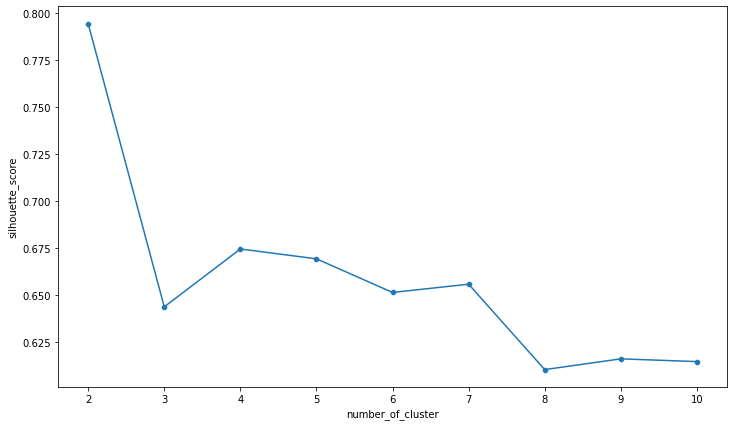

In [123]:
plt.figure(figsize=(12,7))
sns.lineplot(number_of_cluster, r_s_score)
sns.scatterplot(number_of_cluster, r_s_score)
plt.xlabel('number_of_cluster')
plt.ylabel('silhouette_score')
plt.show()

    sil_method = 2

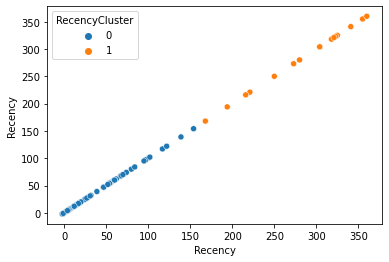

In [124]:
kmeans = KMeans(n_clusters = 2, random_state = 2022)
kmeans.fit(data_rfm[['Recency']])
data_rfm['RecencyCluster'] = kmeans.labels_

sns.scatterplot(x = 'Recency', y = 'Recency', data = data_rfm, hue = 'RecencyCluster')
plt.show()

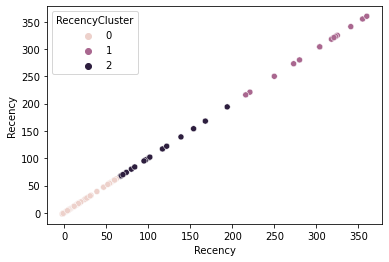

In [125]:
kmeans = KMeans(n_clusters = 3, random_state = 2022)
kmeans.fit(data_rfm[['Recency']])
data_rfm['RecencyCluster'] = kmeans.labels_

sns.scatterplot(x = 'Recency', y = 'Recency', data = data_rfm, hue = 'RecencyCluster')
plt.show()

**Frequency Cluster**

In [126]:
sse = {}
tx_frequency = data_rfm[['Frequency']]
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, max_iter = 100, random_state = 2022).fit(tx_frequency)
    tx_frequency['cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

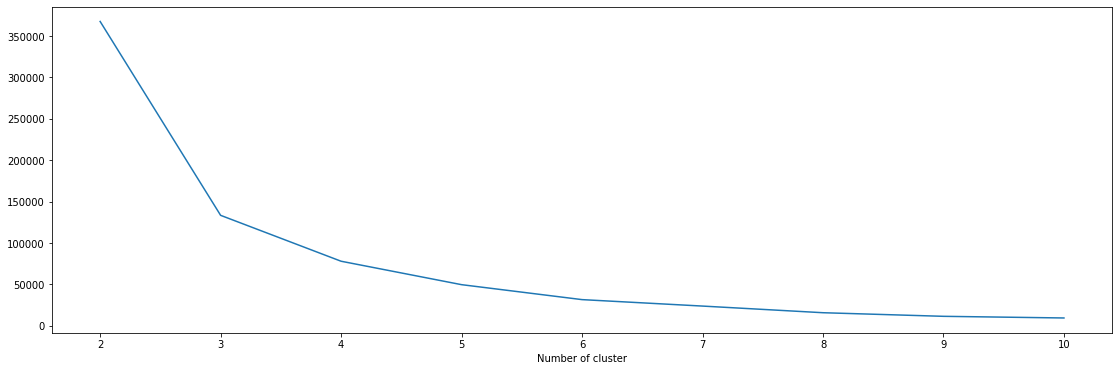

In [127]:
plt.figure(figsize=(19,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

    elbow method = 3

In [128]:
f_s_score = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters = i, random_state = 2022)
    kmeans.fit(tx_frequency)
    labels = kmeans.labels_
    f_s_score.append(silhouette_score(tx_frequency, labels, metric = 'euclidean'))

In [129]:
pd.DataFrame({
    'cluster' : [2,3,4,5,6,7,8,9,10], 
    'result' : f_s_score
})

,cluster,result
0,2,0.736172
1,3,0.719628
2,4,0.667222
3,5,0.664096
4,6,0.597309
5,7,0.573242
6,8,0.583472
7,9,0.573213
8,10,0.567735


Text(0, 0.5, 'silhouette_score')

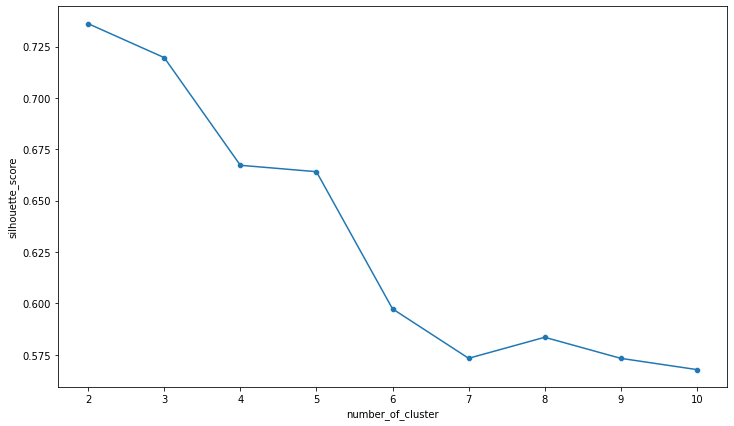

In [130]:
plt.figure(figsize=(12,7))
sns.lineplot(number_of_cluster,f_s_score)
sns.scatterplot(number_of_cluster,f_s_score)
plt.xlabel('number_of_cluster')
plt.ylabel('silhouette_score')

    sil_method = 2

<AxesSubplot:xlabel='Frequency', ylabel='Frequency'>

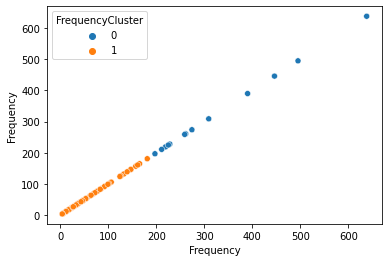

In [131]:
kmeans = KMeans(n_clusters = 2, random_state = 2022)
kmeans.fit(data_rfm[['Frequency']])
data_rfm['FrequencyCluster'] = kmeans.labels_

sns.scatterplot(x= 'Frequency', y='Frequency', data = data_rfm, hue = 'FrequencyCluster')

<AxesSubplot:xlabel='Frequency', ylabel='Frequency'>

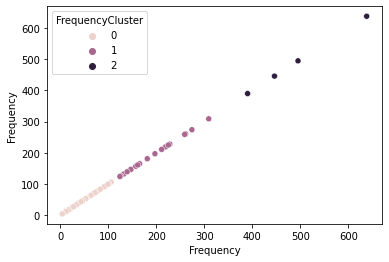

In [132]:
kmeans = KMeans(n_clusters = 3, random_state = 2022)
kmeans.fit(data_rfm[['Frequency']])
data_rfm['FrequencyCluster'] = kmeans.labels_

sns.scatterplot(x= 'Frequency', y='Frequency', data = data_rfm, hue = 'FrequencyCluster')

**Monetary Cluster**

In [133]:
sse = {}
tx_monetary = data_rfm[['Monetary']]
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, max_iter = 100, random_state = 2022).fit(tx_monetary)
    tx_monetary['cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

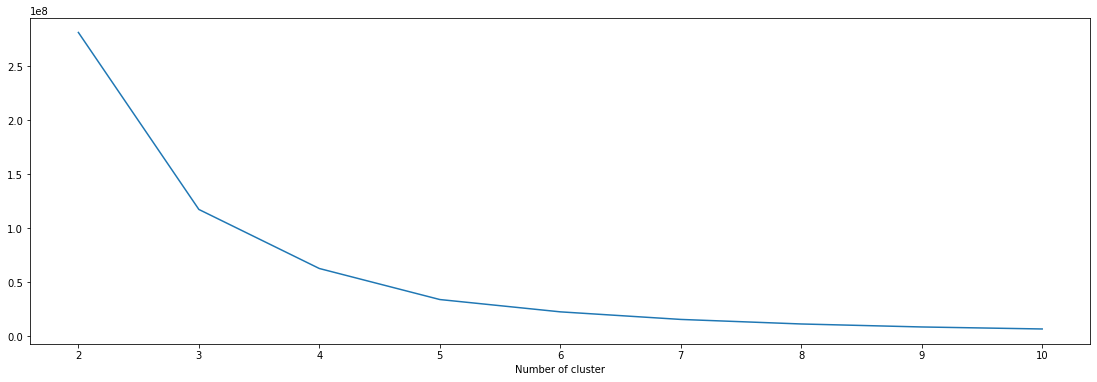

In [134]:
plt.figure(figsize=(19,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

    elbow method = 3

In [135]:
m_s_score = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters = i, random_state = 2022)
    kmeans.fit(tx_monetary)
    labels = kmeans.labels_
    m_s_score.append(silhouette_score(tx_monetary, labels, metric = 'euclidean'))

In [136]:
pd.DataFrame({
    'cluster' : [2,3,4,5,6,7,8,9,10], 
    'result' : m_s_score
})

,cluster,result
0,2,0.827247
1,3,0.734673
2,4,0.740189
3,5,0.735302
4,6,0.686896
5,7,0.610592
6,8,0.586100
7,9,0.574879
8,10,0.569541


Text(0, 0.5, 'silhouette_score')

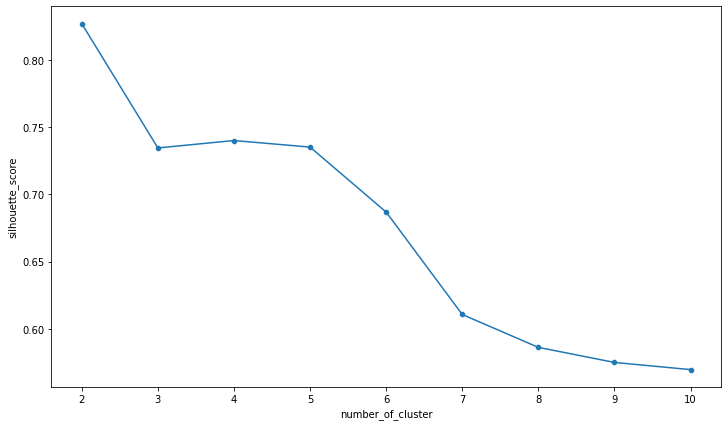

In [137]:
plt.figure(figsize=(12,7))
sns.lineplot(number_of_cluster,m_s_score)
sns.scatterplot(number_of_cluster,m_s_score)
plt.xlabel('number_of_cluster')
plt.ylabel('silhouette_score')

    sil_method = 2

<AxesSubplot:xlabel='Monetary', ylabel='Monetary'>

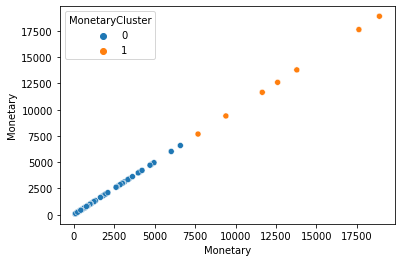

In [138]:
kmeans = KMeans(n_clusters = 2, random_state = 2022)
kmeans.fit(data_rfm[['Monetary']])
data_rfm['MonetaryCluster'] = kmeans.labels_

sns.scatterplot(x= 'Monetary', y='Monetary', data = data_rfm, hue = 'MonetaryCluster')

<AxesSubplot:xlabel='Monetary', ylabel='Monetary'>

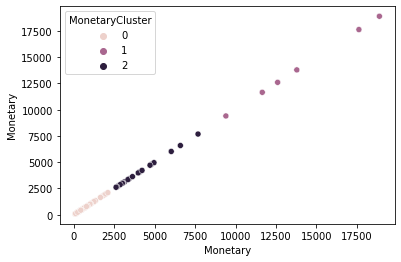

In [139]:
kmeans = KMeans(n_clusters = 3, random_state = 2022)
kmeans.fit(data_rfm[['Monetary']])
data_rfm['MonetaryCluster'] = kmeans.labels_

sns.scatterplot(x= 'Monetary', y='Monetary', data = data_rfm, hue = 'MonetaryCluster')

## **RFM Data**

In [140]:
data_rfm

,CustomerID,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster
0,12413,55,38,758.10,0,0,0
1,12437,-2,197,4785.51,0,1,2
2,12441,355,11,173.55,1,0,0
3,12488,-2,55,1298.66,0,0,0
4,12489,325,15,334.93,1,0,0
...,...,...,...,...,...,...,...
81,12734,341,4,110.40,1,0,0
82,12735,304,43,779.57,1,0,0
83,12736,321,4,234.00,1,0,0
84,12740,52,27,427.60,0,0,0


In [141]:
X = data_rfm[['Recency', 'Frequency', 'Monetary']]

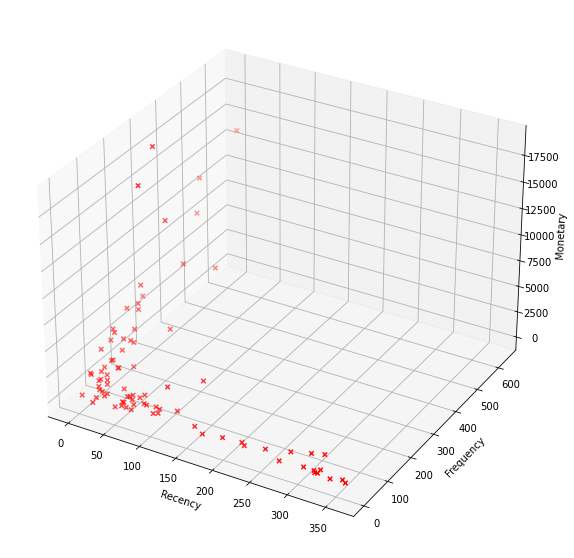

In [142]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')

x = X['Recency']
y = X['Frequency']
z = X['Monetary']

ax.scatter(x,y,z, c='r', marker = 'x')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

In [143]:
number_of_cluster = range(2,11)
clustering = [KMeans(n_clusters = k, random_state = 2022).fit(X) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clustering]

D_k = [cdist(X,cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis = 1) for D in D_k]
dist = [np.min(D, axis = 1) for D in D_k]
avg_withinSS = [sum(d)/X.shape[0] for d in dist]

Text(0, 0.5, 'avg_withinSS')

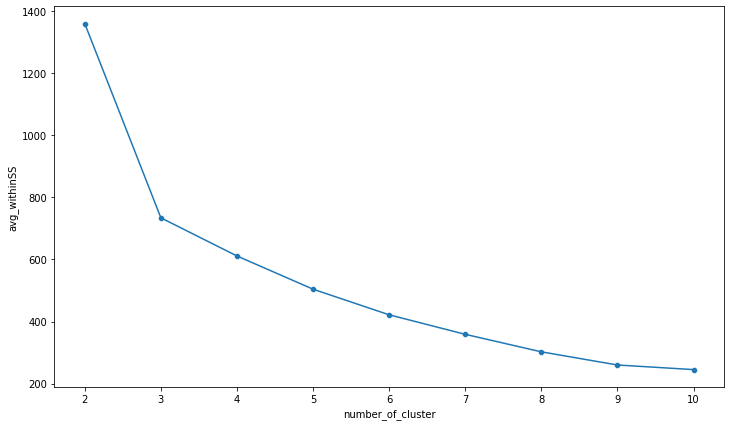

In [144]:
plt.figure(figsize=(12,7))
sns.lineplot(number_of_cluster, avg_withinSS)
sns.scatterplot(number_of_cluster, avg_withinSS)
plt.xlabel('number_of_cluster')
plt.ylabel('avg_withinSS')

    elbow method = 3

**RFM Summary**

In [145]:
# Calculate and Add RFMGroup value column showing combined concatenated score of RFM
data_rfm['RFM_Group'] = data_rfm.RecencyCluster.map(str) + data_rfm.FrequencyCluster.map(str) + data_rfm.MonetaryCluster.map(str)

In [146]:
# Calculate and Add RFMScore value column showing total sum of RFMGroup values
data_rfm['RFM_Score'] = data_rfm['RecencyCluster'] + data_rfm['FrequencyCluster'] + data_rfm['MonetaryCluster']

In [147]:
data_rfm

,CustomerID,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster,RFM_Group,RFM_Score
0,12413,55,38,758.10,0,0,0,000,0
1,12437,-2,197,4785.51,0,1,2,012,3
2,12441,355,11,173.55,1,0,0,100,1
3,12488,-2,55,1298.66,0,0,0,000,0
4,12489,325,15,334.93,1,0,0,100,1
...,...,...,...,...,...,...,...,...,...
81,12734,341,4,110.40,1,0,0,100,1
82,12735,304,43,779.57,1,0,0,100,1
83,12736,321,4,234.00,1,0,0,100,1
84,12740,52,27,427.60,0,0,0,000,0


In [148]:
data_rfm.groupby('RFM_Score')['Recency', 'Frequency', 'Monetary'].mean()

,Recency,Frequency,Monetary
RFM_Score,,,
0,27.000000,47.516129,879.219355
1,283.437500,26.312500,333.036250
2,86.111111,67.555556,3329.374444
3,11.111111,244.055556,5395.746667
4,104.000000,171.666667,4036.856667


Based on elbow method, i can categorized into **4 clusters**.

In [149]:
# Name Customer Segments according to RFM Scores:

# Create function
def rfm_label(data_rfm):
    if data_rfm['RFM_Score'] >= 4:
        return 'Priority'
    elif data_rfm['RFM_Score'] > 3:
        return 'Loyal'
    elif data_rfm['RFM_Score'] > 1:
        return 'Need Attention'
    else:
        return "Not Loyal"

# Apply function
data_rfm['RFM_Label'] = data_rfm.apply(rfm_label, axis = 1)

In [150]:
data_rfm

,CustomerID,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster,RFM_Group,RFM_Score,RFM_Label
0,12413,55,38,758.10,0,0,0,000,0,Not Loyal
1,12437,-2,197,4785.51,0,1,2,012,3,Need Attention
2,12441,355,11,173.55,1,0,0,100,1,Not Loyal
3,12488,-2,55,1298.66,0,0,0,000,0,Not Loyal
4,12489,325,15,334.93,1,0,0,100,1,Not Loyal
...,...,...,...,...,...,...,...,...,...,...
81,12734,341,4,110.40,1,0,0,100,1,Not Loyal
82,12735,304,43,779.57,1,0,0,100,1,Not Loyal
83,12736,321,4,234.00,1,0,0,100,1,Not Loyal
84,12740,52,27,427.60,0,0,0,000,0,Not Loyal


<AxesSubplot:xlabel='count', ylabel='RFM_Label'>

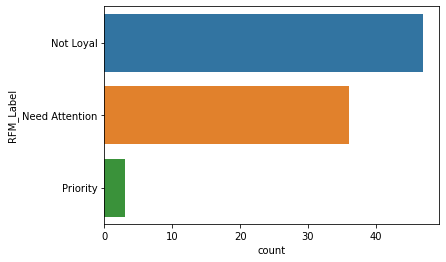

In [151]:
sns.countplot(y = 'RFM_Label', data = data_rfm)

**Merge RFM Result into dataset**

In [152]:
df_france = pd.merge(data,data_rfm,on='CustomerID',how='left')

In [153]:
df_france

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,...,age_category,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster,RFM_Group,RFM_Score,RFM_Label
0,536370,22728,201012,Alarm Clock Bakelike Pink,24,8,2010-12-01 08:45:00,3.75,12583,France,...,Millenials,7,228,6586.61,0,1,2,012,3,Need Attention
1,536370,22727,201012,Alarm Clock Bakelike Red,24,8,2010-12-01 08:45:00,3.75,12583,France,...,Millenials,7,228,6586.61,0,1,2,012,3,Need Attention
2,536370,22726,201012,Alarm Clock Bakelike Green,12,8,2010-12-01 08:45:00,3.75,12583,France,...,Millenials,7,228,6586.61,0,1,2,012,3,Need Attention
3,536370,21724,201012,Panda And Bunnies Sticker Sheet,12,8,2010-12-01 08:45:00,0.85,12583,France,...,Millenials,7,228,6586.61,0,1,2,012,3,Need Attention
4,536370,21883,201012,Stars Gift Tape,24,8,2010-12-01 08:45:00,0.65,12583,France,...,Millenials,7,228,6586.61,0,1,2,012,3,Need Attention
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8013,579870,22636,201111,Childs Breakfast Set Circus Parade,2,16,2011-11-30 16:47:00,8.50,12437,France,...,Generation Z,-2,197,4785.51,0,1,2,012,3,Need Attention
8014,579870,84279P,201111,Cherry Blossom Decorative Flask,4,16,2011-11-30 16:47:00,3.75,12437,France,...,Generation Z,-2,197,4785.51,0,1,2,012,3,Need Attention
8015,579870,22551,201111,Plasters In Tin Spaceboy,12,16,2011-11-30 16:47:00,1.65,12437,France,...,Generation Z,-2,197,4785.51,0,1,2,012,3,Need Attention
8016,579870,22554,201111,Plasters In Tin Woodland Animals,12,16,2011-11-30 16:47:00,1.65,12437,France,...,Generation Z,-2,197,4785.51,0,1,2,012,3,Need Attention


In [154]:
# export
# df_france.to_excel('data_france.xlsx',index=False)